In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
## Loading Dataset
iris = datasets.load_iris()
iris_data  = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
## Standardization
X_train,X_test,Y_train,Y_test = train_test_split(iris_data,iris_data,test_size=0.30,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(105, 4)

In [22]:
#### Clustering have to be done in 2-Dimensions
### Since our data is in 4-dimensions(4 Features) we need to convert it into 2-dimensional data using PCA
##Principal Component Analysis (PCA) is a powerful technique used in machine learning and 
# statistics for dimensionality reduction. It simplifies the complexity in high-dimensional 
# data by transforming it into a lower-dimensional form, while retaining most of the original variability in the data.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)## 'n_components' is used to specify the dimensions in which we have to reduce our data
pca_train_scaled = pca.fit_transform(X_train_scaled)
pca_test_scaled = pca.transform(X_test_scaled)
print(f'X_train_PCA_scaled:{pca_train_scaled.shape}, X_test_PCA_scaled:{pca_test_scaled.shape}')

X_train_PCA_scaled:(105, 2), X_test_PCA_scaled:(45, 2)


##### Now we can see above our 4-Dimensional data(4 feature data) is reduced to 2-Dimensional data(2 feature data)

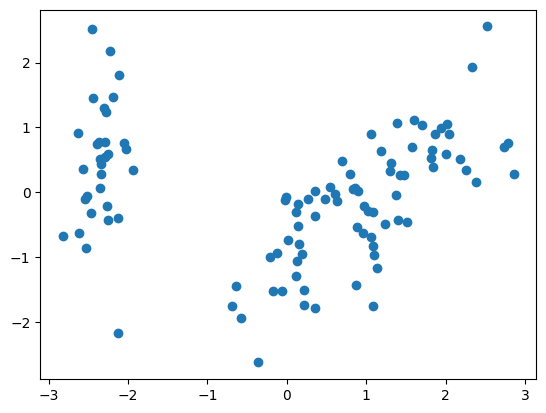

In [26]:
plt.scatter(x=pca_train_scaled[:,0],y=pca_train_scaled[:,1])

Text(0, 0.5, 'Euclidean Distance')

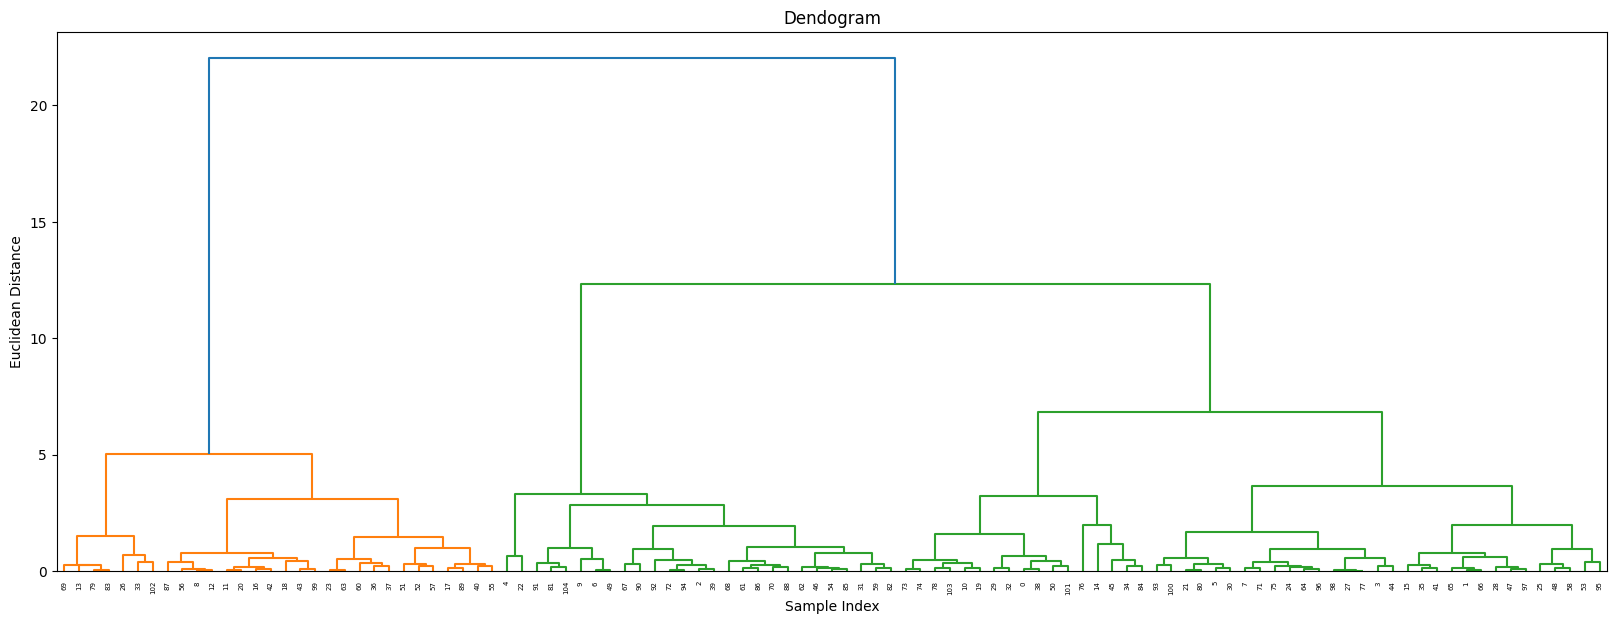

In [27]:
### Agglomarative Clustering
import scipy.cluster.hierarchy as sc # for ploting Dendogram
## Plot the dendogram
plt.figure(figsize=(20,7))
plt.title('Dendogram')

# Creating Dendogram
sc.dendrogram(sc.linkage(pca_train_scaled,method='ward'))# This line is fixed whenever you want to create dendogram use this line of code
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')


##### As we can see our value of 'k' is 2 since the line is cutting through 2 data points from the longest vertical line through which no other horizantal line passes(the blue vertical line in right side)

In [31]:
## Performing Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_train_scaled)

print(cluster.labels_)

[0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]


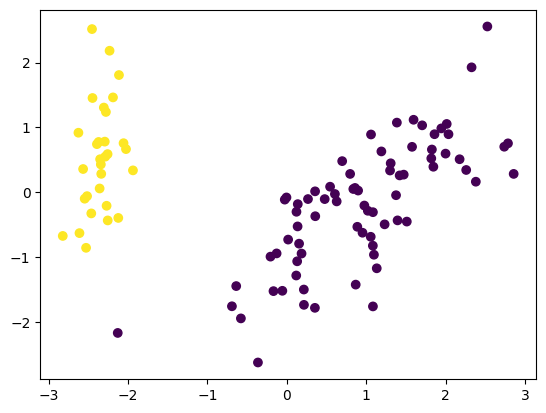

In [33]:
plt.scatter(pca_train_scaled[:,0],pca_train_scaled[:,1],c=cluster.labels_)

In [35]:
## Performance Metrics
from sklearn.metrics import silhouette_score
silhouette_coefficient = []
# Note you start with k=2 for silhouette score
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    cluster.fit(pca_train_scaled)
    score = silhouette_score(pca_train_scaled,cluster.labels_)
    silhouette_coefficient.append(score)

silhouette_coefficient


[np.float64(0.5941609741355451),
 np.float64(0.5292388651718383),
 np.float64(0.4942082492012269),
 np.float64(0.4539126519353147),
 np.float64(0.44738637031970785),
 np.float64(0.45474930132371216),
 np.float64(0.45548572053768116),
 np.float64(0.43847763737012413),
 np.float64(0.42705054407207543)]

Text(0, 0.5, 'Silhouette_Coiefficient')

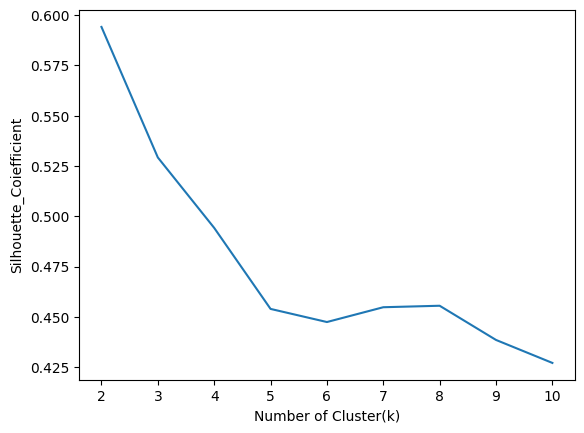

In [37]:
## Plotting silhouette score
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel('Number of Cluster(k)')
plt.ylabel('Silhouette_Coiefficient')